In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
##from xgboost import XGBClassifier               # XGBoost
from sklearn.svm import SVC                     # Support Vector Machine

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [2]:
df = pd.read_csv("heart.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.shape
df.info()
df.describe()
df.isnull().sum()  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [4]:
print(df.columns.tolist())


['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


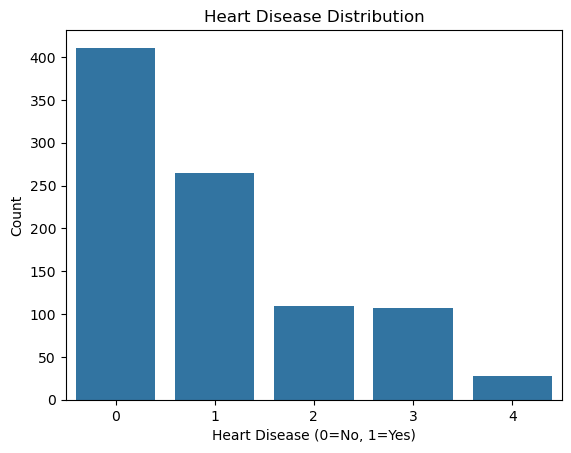

In [5]:
sns.countplot(x='num', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


In [6]:
df.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

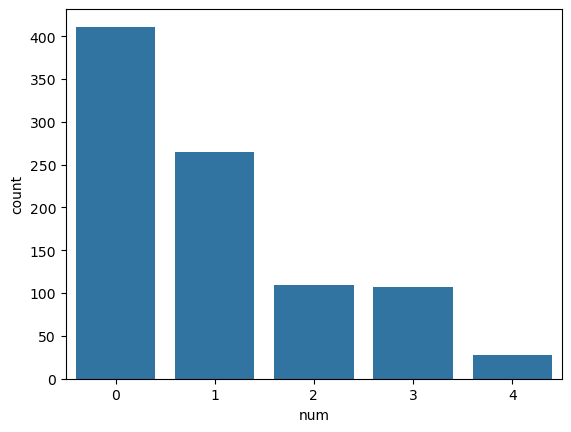

In [7]:
sns.countplot(x='num', data=df)
plt.show()

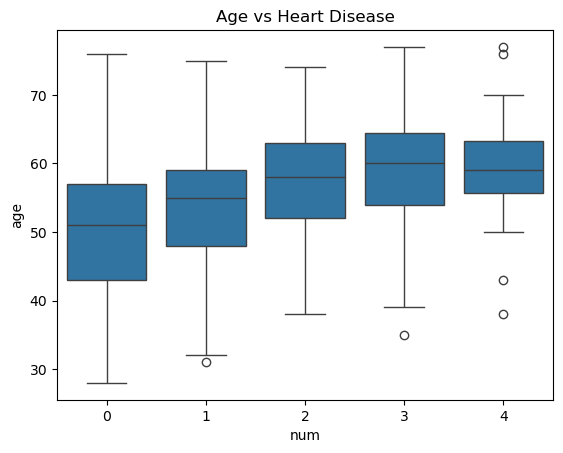

In [8]:
sns.boxplot(x='num', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

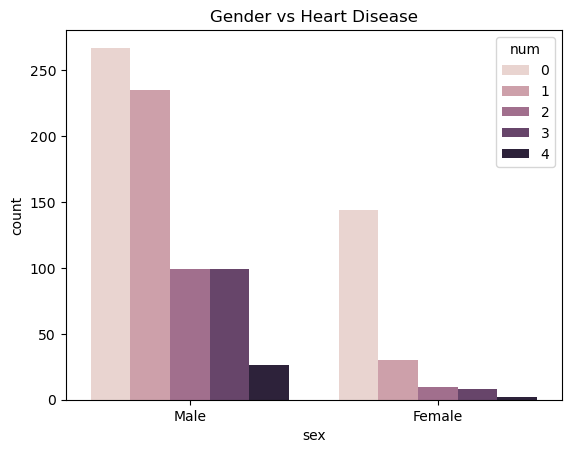

In [9]:
sns.countplot(x='sex', hue='num', data=df)
plt.title("Gender vs Heart Disease")
plt.show()

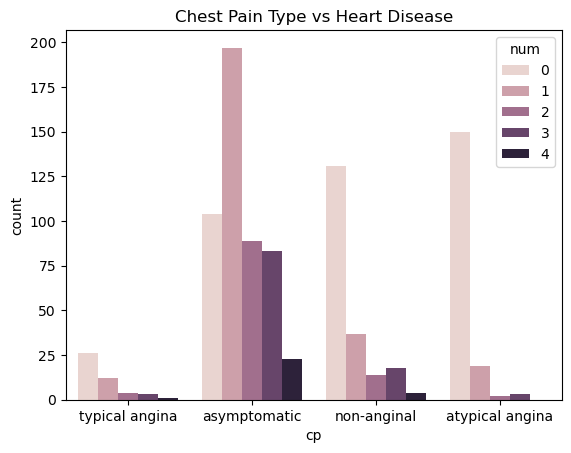

In [10]:
sns.countplot(x='cp', hue='num', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

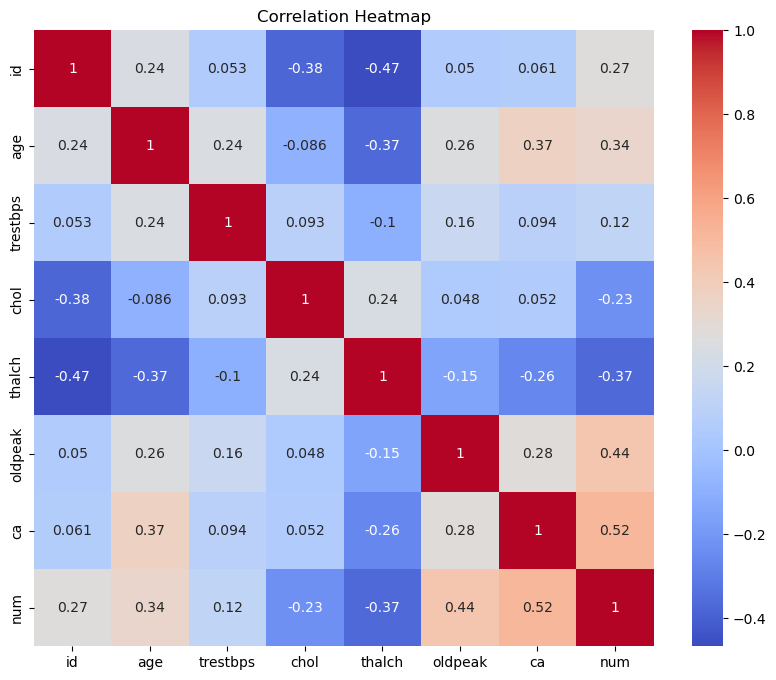

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [12]:
df = df.select_dtypes(include=['int64', 'float64'])

In [13]:
df.dtypes

id            int64
age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
num           int64
dtype: object

In [50]:
print(df.columns.tolist())


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [51]:
X = df.drop(columns=["num"])
y = (df["num"] > 0).astype(int)

In [52]:
print(X.columns.tolist())


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


In [53]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include="object").columns.tolist()

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le



In [54]:
# Numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_features)
print("Categorical Columns:", categorical_features)


Numeric Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Columns: []


In [56]:

# Numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)

In [60]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Train model
log_reg_pipeline.fit(X_train, y_train)

# Predict
log_pred = log_reg_pipeline.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))

Logistic Regression Accuracy: 0.7608695652173914


In [61]:
dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.8206521739130435


In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', SVC(probability=True, kernel='rbf', random_state=42))
])

svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.8043478260869565


                 Model  Accuracy
0  Logistic Regression  0.760870
1                  KNN  0.500000
2        Decision Tree  0.820652
3        Random Forest  0.853261
4                  SVM  0.804348


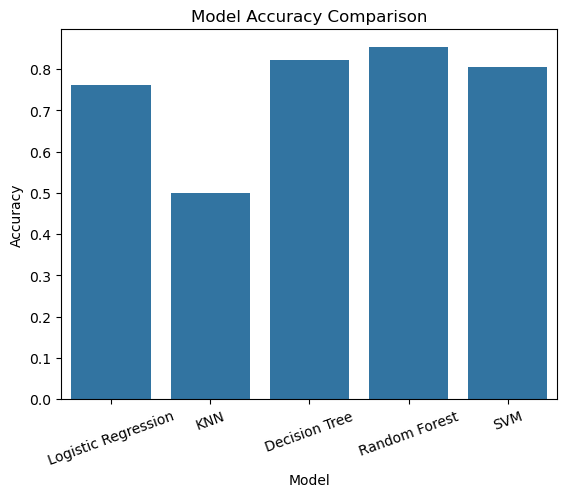

In [67]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, log_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        
        accuracy_score(y_test, svm_pred)
    ]
})

print(results)

sns.barplot(x='Model', y='Accuracy', data=results)
plt.xticks(rotation=20)
plt.title("Model Accuracy Comparison")
plt.show()


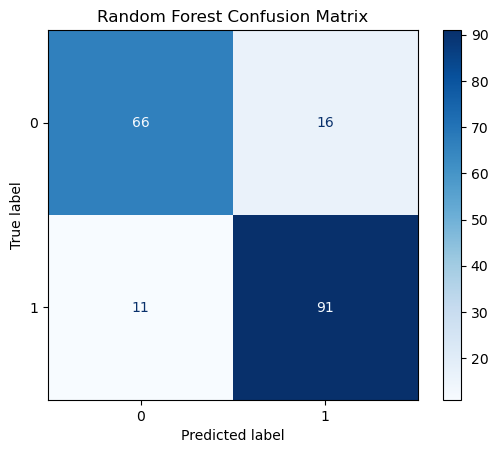

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        82
           1       0.85      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

print(classification_report(y_test, rf_pred, zero_division=0))

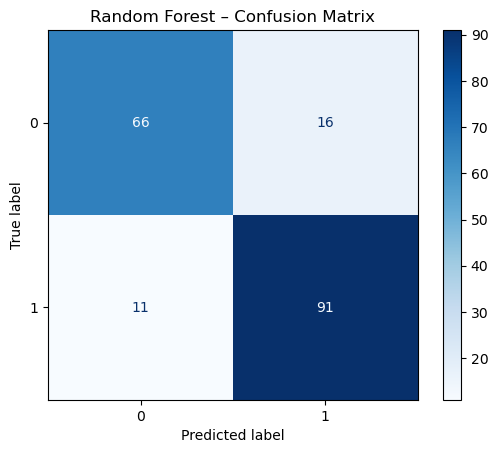

In [69]:
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.title("Random Forest – Confusion Matrix")
plt.show()

In [70]:
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_pred, zero_division=0))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        82
           1       0.85      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [71]:
rf_proba = rf_pipeline.predict_proba(X_test)

# Probability of having heart disease (class = 1)
rf_proba_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': rf_pred,
    'Probability (%)': (rf_proba[:, 1] * 100).round(2)
})

rf_proba_df.head()

,Actual,Predicted,Probability (%)
0,1,1,88.0
1,1,1,88.0
2,1,1,84.0
3,1,1,94.0
4,0,1,94.0


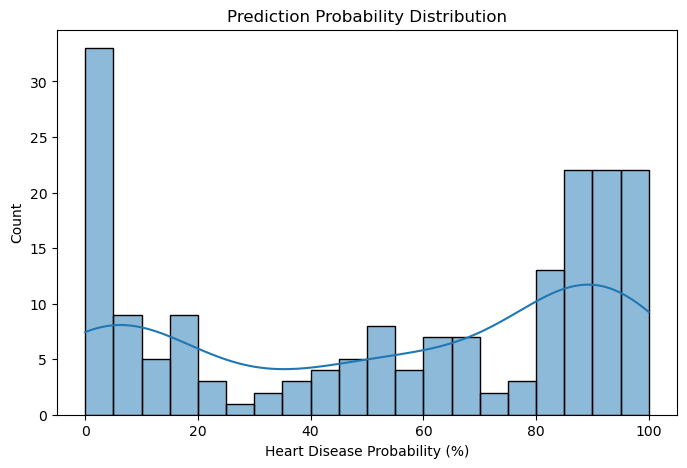

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(rf_proba[:, 1] * 100, bins=20, kde=True)
plt.xlabel("Heart Disease Probability (%)")
plt.title("Prediction Probability Distribution")
plt.show()

In [73]:
high_risk = rf_proba_df[rf_proba_df['Probability (%)'] > 70]
high_risk.head()


,Actual,Predicted,Probability (%)
0,1,1,88.0
1,1,1,88.0
2,1,1,84.0
3,1,1,94.0
4,0,1,94.0


In [74]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
# GridSearchCV
rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [75]:
# Train GridSearch model
rf_grid.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [None, 10, ...], 'model__min_samples_leaf': [1, 2], 'model__min_samples_split': [2, 5], 'model__n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [76]:
print("Best Parameters:")
print(rf_grid.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(rf_grid.best_score_)


Best Parameters:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}

Best Cross-Validation Accuracy:
0.846442360728075


In [77]:
best_rf_model = rf_grid.best_estimator_

rf_grid_pred = best_rf_model.predict(X_test)

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, rf_grid_pred))


Tuned Random Forest Accuracy: 0.8586956521739131


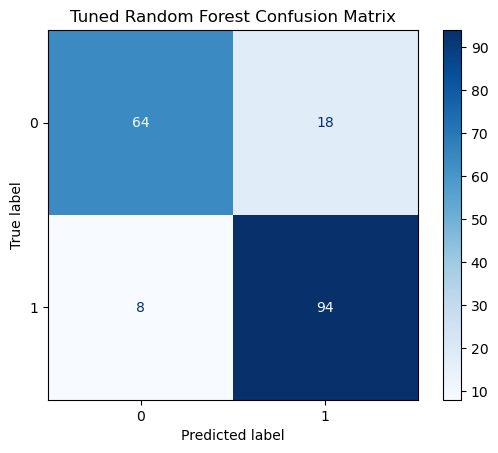

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_grid_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()


In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_grid_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.89      0.78      0.83        82
           1       0.84      0.92      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



In [80]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [48]:
import joblib

joblib.dump(rf_pipeline, "best_rf_model.pkl")
print("Random Forest model saved successfully")


Random Forest model saved successfully


In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
0,id,0.367970
5,oldpeak,0.144263
4,thalch,0.118963
1,age,0.111496
3,chol,0.106370
6,ca,0.090084
2,trestbps,0.060854


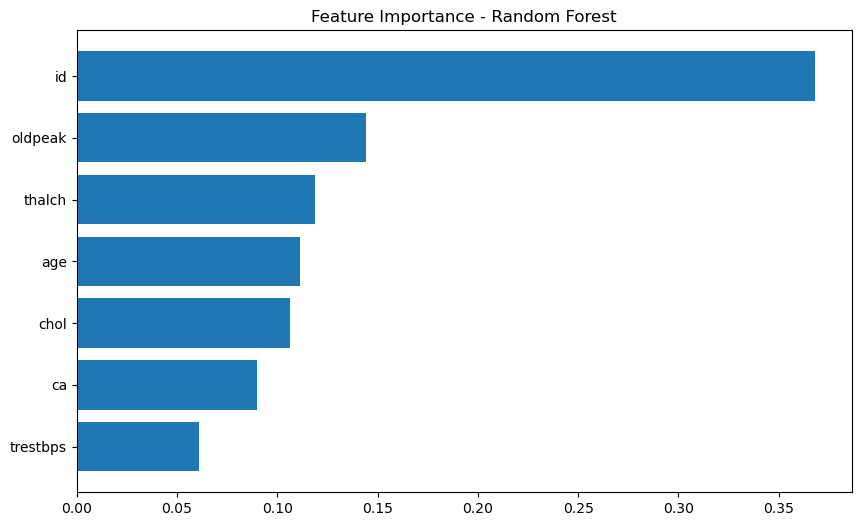

In [82]:
plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()


In [83]:
X.columns.tolist()


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [84]:
print(len(X.columns))
print(X.columns)


7
Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')
